# Case Study 6 - Neural Networks

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations, Model Enhancements and Alternative Modeling Approaches](#model-enhancements)

# Business Understanding & Executive Summary <a id='business-understanding'/>

## Objective:

The objective of this case study is to predict the detection of a new subatomic particle with high accuracy from a dataset with 7 million records.  

## Introduction:
No information regarding the data in the case study was provided; the only stipulation given was to classify a binary variable representing "the existence of a particle" using a neural network. In terms of data detection of the binary classifier, 1 represents detection, and 0 represents non-detection. The client has advised that this is a massive amount of data best modeled with Neural Networks, and a high level of accuracy is critical.

### Artificial Neural Networks

Neural networks are based on brain biology and stimulate the brain's function. Based on neuroscience, neurons are connected by axons to other neurons. This concept is applied in an Artificial Neural Network (ANN). An ANN comprises groups of "neurons" called layers. These layers are connected in a network to take inputs from the dataset, fit model weights to the inputs, and eventually produce outputs that can be used to classify a target variable. The layers between the inputs and the target outputs in a neural network are called hidden layers.   

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_6/Neural_Network_fig.png" width=400 height=400 />

Physiologically, neurons work by firing signals only when a certain signal "threshold" is reached. This behavior is mimicked by ANNs. Any signal input below the threshold will not result in an output from the neuron, while any signal at or above the threshold will result in a constant output. Various activation functions are used to mathematically approximate how a neuron works. Activation functions are equations that determine the output of a neural network model. 

Some of the common activation functions are discussed below:


<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_6/Activation%20Function.png" width=900 height=900 />


Each neuron represents a regression in the neural network and calculates an output. A neural network is an ensemble of many regressors that will take the outputs of previous regressors as inputs. This results in a large ensemble of regression models.


## Modeling:

### Training and Test Split
The data were split into 70% training and 30% test sets.  Cross validation was not considered due to the size of the dataset and the complexity of the model; the compute time would have been excessive without adding much value.  

### Key Metrics
The key metric used to evaluate the models was accuracy.  Accuracy was appropriate because the target variable was balanced with a 50/50 split between Detection and Non-Detection classes.  Accuracy is a straightforward metric that is intuitive and easy to explain, and the customer also requested that the team focus on accuracy.        

### Results

A baseline model was built using logistic regression as a simpler and more interpretable option.  This model had an __83.6%__ accuracy between the training and test sets and had several highly important features including 'mass' and 'f6' per the plot below:  

Logistic Test Set - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 879,402         | 170,334              |
| Actual Detected | 172,538           | 877,726         |

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_6/LogReg_Feature_Importance.png" width=400 height=400 />


A neural network (NN) model was built to try to beat this simpler baseline model.  The final neural network model had an accuracy of __88.0%__ between the training and test sets.  This is a significant improvement, especially given how expensive it is to run experiments on a large particle accelerator.  The model took a few minutes longer to train than the simpler logistic regression model, as expected.  This additional training was not excessive and significantly improved the accuracy of the predictions.           

__TODO:__ Final NN Test Set - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 903,103         | 146,633              |
| Actual Detected | 104,938           | 945,326        |

Comparing this confusion matrix to the one above for the baseline model, predictions were improved for both the Detected and Not Detected classes with the Neural Network model.  The __4.4% improvement in accuracy__ is equivalent to __91,301 more correct predictions__.        


## Conclusion
The team built a model with relatively high accuracy using a neural network.  The final neural network model should be used to make predictions on whether a new particle is detected or not based on the input data.  There was a high level of agreement between the training and test sets, and care was taken to prevent overfitting and create a generalizable model, so results should be reliable if similar experiments are conducted in the future.  


## Future Considerations
The team recommends that Shapley values be explored for local feature importance for the neural network model.  In addition, input from domain experts may help with feature engineering, model building, and interpretation.  Additional computation power or parallelization may also be useful to speed up model training.    

# Data Evaluation <a id='data-evaluation'>
    

Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: Are there missing values? Which variables are needed (which ones are not)? What assumptions or conclusions are you drawing that need to be relayed to your audience?

## Loading Data <a id='loading-data'>

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image
#from IPython.display import clear_output
#import sklearn
import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# prediction models
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [3]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [4]:
class Loader:
    df = pd.DataFrame()
    
    #@abstractmethod
    def load_data(self, file_name):
        pass
    
    #@abstractmethod
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [5]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [7]:
def clean_data(df):
    df['# label'] = df['# label'].astype(int)
    return df

In [8]:
loader = CSVLoader(FilePathManager('data/all_train.csv'))
loader.load_data(clean_data)
df = loader.get_df()

## Data Summary <a id='data-summary'>
    
### Data Exploration and Manipulation:
    
The provided data, although not described in detail, is a large dataset consisting of 28 features and a binary class. The column mass is the only named feature; all others are arbitrarily numbered, and all features are numeric. There are seven million observations. There are no known missing values in the data with the caveat that it is unknown whether zeros could constitute missing data.
The only manipulation required for preparing this data for use in a neural network model is to change the target class object type to Boolean to save a small amount of space and to normalize the range of the features, which was performed after the data was split into test/train data set. In addition, the target classes are very well balanced in the dataset.


## Missing Values <a id='missing-values'>
There are no missing Values -- elaborate on this point later 


## Exploratory Data Analysis (EDA) <a id='eda'>



In [9]:
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


### Scaling and Skew

In [10]:
feature_summary = df.iloc[:, 1:29].describe().T
feature_summary

,count,mean,std,min,25%,50%,75%,max
f0,7000000.0,0.016125,1.004417,-1.960549,-0.728821,-0.039303,0.690080,4.378282
f1,7000000.0,0.000477,0.997486,-2.365355,-0.733255,0.000852,0.734783,2.365287
f2,7000000.0,0.000027,1.000080,-1.732165,-0.865670,0.000320,0.865946,1.732370
f3,7000000.0,0.010561,0.995600,-9.980274,-0.609229,0.019633,0.679882,4.148023
f4,7000000.0,-0.000105,0.999867,-1.732137,-0.865802,-0.000507,0.865765,1.731978
f5,7000000.0,0.002766,1.000957,-1.054221,-1.054221,-0.005984,0.850488,4.482618
f6,7000000.0,0.018160,0.986775,-3.034787,-0.756609,-0.149953,0.768669,3.720345
f7,7000000.0,0.000025,0.996587,-2.757853,-0.701415,-0.000107,0.701319,2.758590
f8,7000000.0,0.000435,1.000007,-1.732359,-0.865654,0.001385,0.866598,1.731450
f9,7000000.0,-0.006870,1.001938,-1.325801,-1.325801,0.754261,0.754261,0.754261


### Highly Skewed Features

In [11]:
right_skew = feature_summary.loc[feature_summary['max'] > feature_summary['mean'] + feature_summary['std']*4]
left_skew = feature_summary.loc[feature_summary['min'] < feature_summary['mean'] - feature_summary['std']*4]
skew = pd.concat([right_skew.T, left_skew.T], axis=0, join='outer')
skew.head(8)

,f0,f3,f5,f10,f14,f18,f22,f23,f24,f25,f26
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,1.612528e-02,1.056081e-02,2.765919e-03,1.754267e-02,1.724634e-02,1.164789e-02,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02
std,1.004417e+00,9.956003e-01,1.000957e+00,9.941511e-01,9.994654e-01,1.002725e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01
min,-1.960549e+00,-9.980274e+00,-1.054221e+00,-2.835563e+00,-2.454879e+00,-1.728284e+00,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00
25%,-7.288206e-01,-6.092291e-01,-1.054221e+00,-7.237266e-01,-6.996179e-01,-7.423630e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01
50%,-3.930319e-02,1.963316e-02,-5.983562e-03,-1.285732e-01,-9.749269e-02,-8.992496e-02,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02
75%,6.900799e-01,6.798818e-01,8.504885e-01,6.478635e-01,6.347052e-01,6.423185e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01
max,4.378282e+00,4.148023e+00,4.482618e+00,4.639335e+00,5.535799e+00,5.866367e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00


#### Skewed, no major outliers

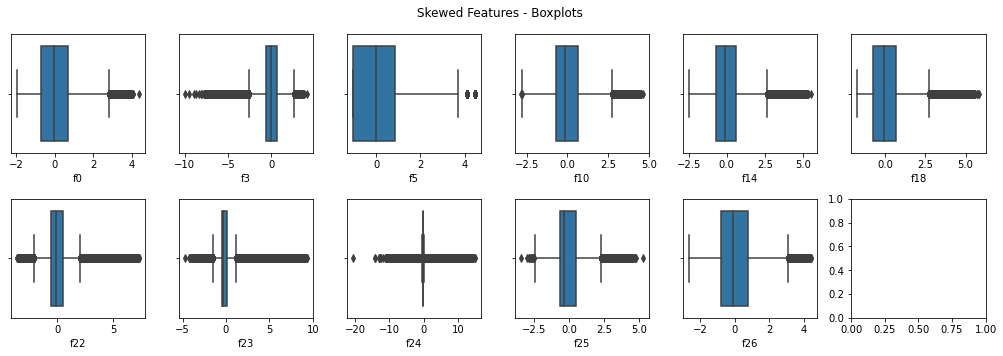

In [12]:
fig, axes = plt.subplots(2, 6, figsize=(14, 5))
fig.suptitle('Skewed Features - Boxplots')
for i,j in zip(skew.columns, range(11)):
    sns.boxplot(ax = axes[int(j/6), j%6], x = df[i])

fig.tight_layout()

    
### Target Variable Class Distribution

    
<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_6/Target_Variable_Class_Distribution.png" width=400 height=400 />

    
Also, correlations between features f6, f10, f14, f18, and f26 were observed and also with the target variable. However, all the variables will be included in the model fitting exercise as there is no domain knowledge of the features to assess if some of them can be excluded from the analysis instead of the others.

    
        
<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_6/Correlation_heat_map.png" width=600 height=600 />
   

# Model Preparations <a id='model-preparations'/>

Which methods are you proposing to utilize to solve the problem?  Why is this method appropriate given the business objective? How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)?  More specifically, what evaluation metrics are most useful given that the problem is a classification one (ex., Accuracy, F1-score, Precision, Recall, AUC, etc.)?

## Sampling & Scaling Data <a id='sampling-scaling-data' />


Training and test sets were created from the data using the stratified method to maintain the ratio of the binary outcome.  This was done in an abundance of caution, because the classes are almost perfectly balanced. 30% of the data was withheld for the test set, and the defining features were normalized.


## Proposed Method <a id='proposed-metrics' />

The stakeholders wanted our team to focus on creating a model that would predict the existence of a new particle with high accuracy above all, and the model interpretability was not a priority. With this mind the team decided on using an Artificial Neural Network to achieve a high accuracy model. The model had an input layer of 28 neurons (one for each of the features), and it had 2 hidden layers with 200 neurons and 50 neurons, respectively.  The hidden layers used a ReLu activation functoin, which was chosen for its characteristics that helps estimating non-linear functions. The model had a single neuron output layer with a sigmoid activation function and a BinaryCrossentropy loss function since our target variable is binary. 

In experimentations our best results were achieved with a batch size of 1000. This gave a large enough sample size to limit unnecessary fluctations, and this gave the model the right balance between variance and bias. Additionally, the batch sizes were small enough to compute in memory, but not so small that it would increase processing time dramatically.  Batch sizes of 10,000 and 100,000 ran faster but resulted in slower learning with lower accuracy.  The team ran 40 epochs with a batch size of 1000 since no further improvement was observed beyond that without risking overfitting.     

### Code

In [13]:
class BaseImputer:
    #@abstractmethod
    def fit(self, X, y=None):
        pass
    
    #@abstractmethod
    def transform(self, X):
        pass

class BaseModel:
    #@abstractmethod
    def fit(self, X, y, sample_weight=None):
        pass
    
    #@abstractmethod
    def predict(self, X):
        passb

In [14]:
class Modeling:
    _X_train_fitted = None
    _X_test_fitted = None
    _y_train = None
    _y_test = None
    _y_preds = None
    
    def __init__(self, data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None):
        self._data = data
        self._target_name = target_name
        self._shuffle_splitter = shuffle_splitter
        self._imputer = imputer
        self._model = model
        self._X, self._y = self._split_data()
        self._scaler = scaler
        
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y

    @property
    def model(self):
        return self._model
    
    @model.setter
    def model(self, model):
        self._model = model
     
    @property
    def X_train(self):
        return self._X_train_fitted
    
    @property
    def X_test(self):
        return self._X_test_fitted
    
    @property
    def y_train(self):
        return self._y_train
    
    @property
    def y_test(self):
        return self._y_test
    
    @property
    def y_preds(self):
        return self._y_preds
    
    def _split_data(self):
        X = self._data.copy()
        return X.drop([self._target_name], axis=1) , X[self._target_name]
    
    def _shuffle_split(self):
        X = self.X
        y = self.y
        for train_index, test_index in self._shuffle_splitter.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        return X_train, X_test, y_train, y_test
    
    def _fit_imputer(self, train):
        if self._imputer is not None:
            self._imputer.fit(train)
    
    def _fit_scaler(self, train):
        if self._scaler is not None:
            self._scaler.fit(train)
    
    def _impute_data(self, X: pd.DataFrame):
        if self._imputer is not None:
            return pd.DataFrame(self._imputer.transform(X), columns = self.X.columns, index = X.index)
        return X
    
    def _scale_data(self, X: pd.DataFrame):
        if self._scaler is not None:
            X = pd.DataFrame(self._scaler.transform(X), columns = self._X.columns)
        return X
    
    def prepare(self):
        X_train, X_test, y_train, y_test = self._shuffle_split()   
        self._fit_imputer(X_train)
        X_train = self._impute_data(X_train)
        X_test = self._impute_data(X_test)
        self._fit_scaler(X_train)
        self._X_train_fitted = self._scale_data(X_train)
        self._X_test_fitted = self._scale_data(X_test)
        self._y_train = y_train
        self._y_test = y_test
        
    def prepare_and_train(self):
        self.prepare()
        return self.train()
        
    def train(self): 
        self._model.fit(self.X_train, self.y_train) 
        self._y_preds = self._model.predict(self.X_train)
        
        return self.metrics(self.y_train, self.y_preds)
        
    def test(self):
        return self.metrics(self.y_test, self._model.predict(self.X_test))
       
        
    def metrics(self, y_true = None, y_pred = None):
        pass

In [15]:
class ClassificationModeling(Modeling):
    def __init__(self, 
                 data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None,
                 beta: int = 1,
                 classification: str = 'binary'):
        super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler)
        self.beta = beta
        self.classification = classification
    
    def metrics(self, y_true = None, y_pred = None):
        if y_true is None and y_pred is None:
            y_true = self.y_train
            y_pred = self.y_preds
        return ({'matrix': confusion_matrix(y_true, y_pred), 
            'accuracy': accuracy_score(y_true, y_pred), 
            'precision': precision_score(y_true, y_pred, average=self.classification), 
            'recall': recall_score(y_true, y_pred, average=self.classification),
             'f1': f1_score(y_true, y_pred),
            'f{}'.format(self.beta) : fbeta_score(y_true, y_pred, average=self.classification, beta=self.beta) } )

In [16]:
class NNClassificationModeling(ClassificationModeling):
    def __init__(self, 
             data: pd.DataFrame, 
             target_name: str, 
             shuffle_splitter: BaseShuffleSplit, 
             imputer: BaseImputer, 
             model: BaseModel, 
             scaler = None,
             beta: int = 1,
             classification: str = 'binary', tb_callback = TensorBoard(log_dir="logs/", histogram_freq=1)):
        super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler, beta, classification)
        self.tb_callback=tb_callback
        
        
    def train(self, epoch, batch):
        logDir = "logs/{epoch}-{batchsize}-{time}".format(epoch=epoch, batchsize=batch, time=time.time())
        self.tb_callback.log_dir = logDir
        self._model.fit(self.X_train, self.y_train, batch_size=batch, epochs=epoch, validation_data=(self.X_test, self.y_test), callbacks=[self.tb_callback])
        self._y_preds = self._model.predict(self.X_train)
        return self.metrics(self.y_train, self.y_preds)
    
    def metrics(self, y_true = None, y_pred = None):
        if y_true is None and y_pred is None:
            y_true = self.y_train
            y_pred = self.y_preds
            
        y_pred = pd.Series(y_pred.reshape((y_pred.shape[1], y_pred.shape[0]))[0], index=y_true.index)
        y_pred = pd.Series( (y_pred>0.5).astype(int), index=y_true.index)
        return super().metrics(y_true,y_pred)
    

## Evaluation Metrics <a id='evaluation-metrics' />
The key metric used to evaluate the models was accuracy.  Accuracy was appropriate because the target variable was balanced with a 50/50 split between Detection and Non-Detection classes.  It is a straightforward metric that is intuitive and easy to explain, and the customer also requested that the team focus on accuracy.        

### Baseline Model

For our baseline model the team decided to run a logistic regression model. The model used a 70/30 stratified split, with L1 penalty and saga solver. The logistic model was chosen as this a simple, quick, and interprateable model. This gave the team a benchmark for accuracy to compare the proposed artificial neural network accuracy. 

In [17]:
baseline = ClassificationModeling(df,'# label',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None,
                           LogisticRegression(penalty='l1', solver='saga', random_state=12343),
                           StandardScaler(), beta=2)

baseline.prepare()

In [18]:
baseline_results = pd.DataFrame()

for i in [0.0001, 0.0005, 0.001, .005, 1, 100]:
    baseline.model.C = i
    baseline_results = baseline_results.append({"C": i,
                                               "Train Accuracy": round( baseline.train()['accuracy'], 4),
                                               "Test Accuracy": round( baseline.test()['accuracy'], 4)},
                                              ignore_index=True)

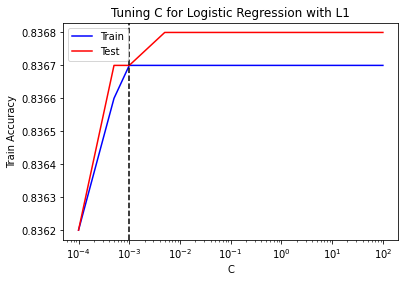

In [19]:
sns.lineplot(data=baseline_results, x='C', y='Train Accuracy', color='blue')
sns.lineplot(data=baseline_results, x='C', y='Test Accuracy', color='red')
plt.title('Tuning C for Logistic Regression with L1')
plt.legend(['Train', 'Test'])
plt.xscale('log')
plt.axvline(0.001, color='black', ls='--')
plt.show()

#### Best Baseline Logistic Model

In [20]:
baseline.model.C = 0.001
baseline.train() 

{'matrix': array([[2052192,  397193],
        [ 402982, 2047633]]),
 'accuracy': 0.8366989795918367,
 'precision': 0.8375373134938846,
 'recall': 0.8355588291102437,
 'f1': 0.8365469014946764,
 'f2': 0.8359537778410662}

In [21]:
baseline.test()

{'matrix': array([[879402, 170334],
        [172538, 877726]]),
 'accuracy': 0.836727619047619,
 'precision': 0.8374768620117169,
 'recall': 0.8357194000746478,
 'f1': 0.8365972080574782,
 'f2': 0.8360703021232528}

## Feature Selection <a id='feature-selection' />

All the features were used in the proposed neural network model. The team chose not use regularization since the training and test set evalution metric results aligned, which indicates that the neural network model was not overfitting. 


# Model Building & Evaluations <a id='model-building'/>

### Final Model


The team initially fit a Logistic Regression model to the data set to get a baseline accuracy rate for the prediction. Then, a neural network model was fit to assess the improvement in the accuracy rate.

The final model had an input layer of 28 neurons (one for each of the features), and it had 2 hidden layers with 200 neurons and 50 neurons, respectively.  The hidden layers used a ReLu activation functoin, which was chosen for its characteristics that helps estimating non-linear functions. The model had a single neuron output layer with a sigmoid activation function and a BinaryCrossentropy loss function since our target variable is binary. 

In experimentations our best results were achieved with a batch size of 1000. This gave a large enough sample size to limit unnecessary fluctations, and this gave the model the right balance between variance and bias. Additionally, the batch sizes were small enough to compute in memory, but not so small that it would increase processing time dramatically.  Batch sizes of 10,000 and 100,000 ran faster but resulted in slower learning with lower accuracy.  The team ran 40 epochs with a batch size of 1000 since no further improvement was observed beyond that without risking overfitting. 

In [22]:
NN = NNClassificationModeling(df,'# label',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None,
                           None,
                           StandardScaler(), beta=2)

NN.prepare()

In [23]:
NN.model = tf.keras.Sequential() # model object

NN.model.add( tf.keras.layers.Input( shape=(NN.X_train.shape[1],) ) )
# specify data shape for first input layer
# columns (features) only, # rows specified by batch size later in fit() 

NN.model.add( tf.keras.layers.Dense(200, activation = 'relu') )
# add these layers sequentially with decreasing # neurons
NN.model.add( tf.keras.layers.Dense(50, activation = 'relu') )

NN.model.add( tf.keras.layers.Dense(1, activation = 'sigmoid') )
# Final layer, Regression Output
# For Classification, use activation = 'sigmoid' or 'softmax' for Final layer

NN.model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
# Have to compile model after specifying layers

NN.train(batch = 100000, epoch=40)

Epoch 1/40
49/49 [==============================] - 14s 244ms/step - loss: 0.4290 - accuracy: 0.7961 - val_loss: 0.3508 - val_accuracy: 0.8403
Epoch 2/40
49/49 [==============================] - 10s 205ms/step - loss: 0.3368 - accuracy: 0.8452 - val_loss: 0.3260 - val_accuracy: 0.8497
Epoch 3/40
49/49 [==============================] - 9s 179ms/step - loss: 0.3196 - accuracy: 0.8527 - val_loss: 0.3126 - val_accuracy: 0.8557
Epoch 4/40
49/49 [==============================] - 10s 197ms/step - loss: 0.3072 - accuracy: 0.8577 - val_loss: 0.3013 - val_accuracy: 0.8602
Epoch 5/40
49/49 [==============================] - 9s 183ms/step - loss: 0.2983 - accuracy: 0.8612 - val_loss: 0.2947 - val_accuracy: 0.8628
Epoch 6/40
49/49 [==============================] - 10s 195ms/step - loss: 0.2932 - accuracy: 0.8634 - val_loss: 0.2907 - val_accuracy: 0.8647
Epoch 7/40
49/49 [==============================] - 9s 182ms/step - loss: 0.2896 - accuracy: 0.8652 - val_loss: 0.2875 - val_accuracy: 0.8667
Ep

{'matrix': array([[2109145,  340240],
        [ 244760, 2205855]]),
 'accuracy': 0.8806122448979592,
 'precision': 0.8663679085030213,
 'recall': 0.9001230303413633,
 'f1': 0.8829229633098579,
 'f2': 0.8931632081648418}

In [24]:
NN.test()

{'matrix': array([[903103, 146633],
        [104938, 945326]]),
 'accuracy': 0.8802042857142857,
 'precision': 0.8657156541591763,
 'recall': 0.9000841693136202,
 'f1': 0.8825654472013418,
 'f2': 0.8929938796697157}

## Model's Performance Analysis <a id='performance-analysis'/>

A baseline model was built using logistic regression as a simpler and more interpretable option.  This model had an __83.6%__ accuracy between the training and test sets.  Because of the agreement in accuracy between training and test sets, the confusion matrix below is only for the test set (training set confusion matrices are in the appendix for reference). 

Logistic Test Set - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 879,402         | 170,334              |
| Actual Detected | 172,538           | 877,726         |


A neural network (NN) model was built to try to beat this simpler baseline model.  The final neural network model had an accuracy of __88.0%__ between the training and test sets.  This is a significant improvement, especially given how expensive it is to run experiments on a large particle accelerator.  The model took approximately __6 minutes__ to train which was longer than the simpler logistic regression model, as expected.  This additional training was not excessive and significantly improved the accuracy of the predictions.           

__TODO:__ Final NN Test Set - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 903,103         | 146,633              |
| Actual Detected | 104,938           | 945,326        |

Comparing this confusion matrix to the one above for the baseline model, predictions were improved for both the Detected and Not Detected classes with the Neural Network model.  The __4.4% improvement in accuracy__ is equivalent to __91,301 more correct predictions__.      

## Model Interpretability & Explainability <a id='model-explanation'>

### Examining Feature Importance <a id='examining-feature-importance'/>


#### Feature Importance for Baseline Model

The logistic regression baseline model had several highly important features including 'mass' and 'f6' per the plot below.  Domain experts are needed to intrepret these results further.    

The neural network model is less interpretable and does not have global feature importance to directly compare to the logistic regression model.  There are opportunities to explore local feature importance which is discussed in the Future Considerations section below.

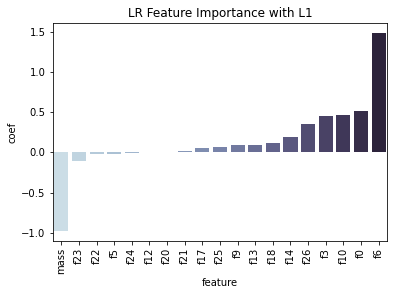

In [27]:
feat_coef = []
feat = zip(baseline.X_train.columns, baseline.model.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_baseline = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

feat_plot = sns.barplot(data=top_feat_baseline, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title('LR Feature Importance with L1')
plt.show()

# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>
The final neural network model should be used to make predictions on whether a new particle is detected or not based on the input data.  There was a high level of agreement between the training and test sets, and care was taken to prevent overfitting and create a generalizable model, so results should be reliable if similar experiments are conducted in the future.  

### Future Considerations, Model Enhancements and Alternative Modeling Approaches <a id='model-enhancements'/>

The team recommends that Shapley values be explored for local feature importance for the neural network model.  In addition, input from domain experts may help with feature engineering, model building, and interpretation.  Additional computation power or parallelization may also be useful to speed up model training.    

## References
https://www.tibco.com/reference-center/what-is-a-neural-network

## Appendix

Logistic Train - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 2,052,192       | 397,193             |
| Actual Detected | 402,982            | 2,047,633        |


Final NN Train - Confusion Matrix:

|                   | Predicted Not Detected | Predicted Detected |
|-------------------|---------------|----------------|
| Actual Not Detected  | 2,109,145       | 340,240             |
| Actual Detected | 244,760            | 2,205,855       |
